<a href="https://colab.research.google.com/github/sebasmos/workshops/blob/main/workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 1️⃣ EDA & Study Design

**🎨 Team __**

`Add your team number above`

**👥 Authors**

`Add your names here (alphabetically)`


* 
*
*

**🎯 Goals of this Workshop**
1. Define Inclusion Criteria to build a working cohort
2. Explore the Ground-Truths, present in the data set


**✏️ Expected Deliverables**
1. Flow chart with inclusion and exclusion criteria, reporting who's being left out, by demographics
2. Define the Machine Learning Task to be addressed



**❗ Highlighted Pitfall(s)**
* Sampling and Representation Bias

## 0. Understand the Problem and Dataset

Please go through [Workshop 0](https://colab.research.google.com/gist/joamats/08338a27a51c02179f3d5e8b8f15cecb/workshop_0.ipynb) for an Introduction on the Problem, Dataset and Objective of the Datathon. As the Datathon schedule is very tight, this should be studied prior to attending the Event.


## 1. Inclusion/exclusion Criteria Definition

In discussion between Data Scientists and Clinicians, try to answer these questions:
* What is a reasonable $SaO_2$ and $SpO_2$ cut-off value to avoid aberrant values and venous blood gas value?
* What is a reasonable time offset between $SaO_2$ and $SpO_2$ to create a pair?
* Are there patients from any demographics or with certain comorbidities that should not be included?
* Is there any specific treatment information that may influence?
* How to deal with multiple pairs per patient?


When taking these decisions, keep these into consideration:
* Are we keeping a reasonable amount of patients?
* What are the consequences of these decisions if we were to implement the result of this project in a real setting?
* Are we seggregating any group of patients?
* Are there groups that are more likely to be dropped in any approach and could introduce sampling selection bias?


### ✏️ Discussed Criteria
`Fill in with the ones you come up with as a team `

* 
* 

## 2. Study Cohort Creation

**What is a Flowchart in this context?**

A Flowchart reflects the study cohort creation, by selecting the patients that best suit our study design.

It is a helpful tool to visualize the numbers after applying our inclusion and exclusion criteria.

**Example (part of one):**

<div>
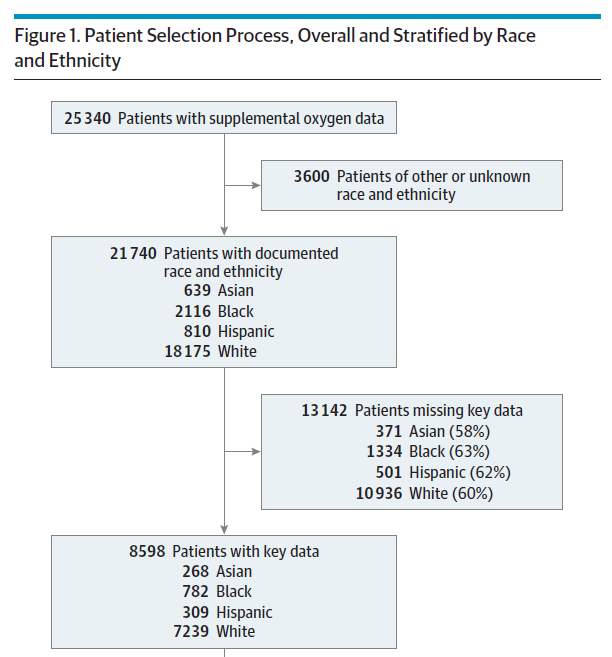
</div>

**Source:**
Gottlieb ER, Ziegler J, Morley K, Rush B, Celi LA. Assessment of Racial and Ethnic Differences in Oxygen Supplementation Among Patients in the Intensive Care Unit. JAMA Intern Med. 2022;182(8):849–858. https://doi:10.1001/jamainternmed.2022.2587

### ✏️ Initial Exploratory Data Analysis (EDA)

`Create code below to answer the following questions`



How many patients do we have per racial-ethnic group, sex, and other demographics?

In [ ]:
# Code here!

What is the $SaO_2$ / $SpO_2$ measurement values range?


In [ ]:
# Code here!

What is the typical $SaO_2$ - $SpO_2$ time offset?

In [ ]:
# Code here!

Does that offset significantly vary for certain groups?

In [ ]:
# Code here!

How many pairs do we have per patient?


In [ ]:
# Code here!

Are there groups with different no. pairs?

In [ ]:
# Code here!

These questions are mere examples. Which other questions are relevant?

In [ ]:
# Code here!

In [ ]:
# Code here!

In [ ]:
# Code here!

### ✏️ Apply you Inclusion / Exclusion Criteria

Now that we have done some Initial EDA, let's define criteria for the study cohort selection

**How to identify Sampling and Representation Bias in a systematic way?**

When we apply inclusion / exclusion criteria, it is important to keep track of the patients that are being left out of the study to spotlight points of sampling bias.

We can create a function that gets the demographic information from a dataframe of patients, to be run this each time we apply an exclusion criteria. 

**This is a good practice of study cohort selection!**

In [ ]:
import pandas as pd
from typing import Dict

def get_demography(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """Get the demography of the cohort.

    Args:
        df (pd.DataFrame): The cohort dataframe.

    Returns:
        dict: A dictionary containing demographic information such as race, sex, 
              and English proficiency, with corresponding proportions.
    """
    demo = {}
    
    demo["race"] = df["race_group"].value_counts(normalize=True).to_dict()

    demo["sex"] = {
        "Male": df["sex_female"].value_counts(normalize=True)[0],
        "Female": df["sex_female"].value_counts(normalize=True)[1]
    }
    
    demo["language"] = df["language"].value_counts(normalize=True).to_dict()

    # You can add other Variables here, following the same structure

    return demo

def print_demo(demo):
    """ Print
      Args:
        dict: A dictionary containing demographic information such as race, sex, 
                English proficiency, ..., with corresponding proportions.
      Returns:
        str: A formatted string to display demographics, that can be printed. 
    """

    demo_str = ""
    for key, value in demo.items():
        if isinstance(value, dict):
            demo_str += f"{key}: ["
            for key2, value2 in value.items():
                demo_str += f"{key2}: {round(value2*100,1)}%, "
            demo_str = demo_str[:-2] + "]\n "
        else:
            demo_str += f"{key}: {round(value*100,1)}%, "
    demo_str = demo_str[:-2]

    return demo_str

  

In [ ]:
# Working Example on the Dataset we just loaded
print_demo(get_demography(data))

We suggest this structure to systematically get the numbers to produce a flowchart:
```
# Remove patients XXX
data_1 = data[data.YYY != XXX]
print(f"Removed {len(data) - len(data_1)} patients without XXX")
demo1 = print_demo(get_demography(df1))
print(f"{len(data_1)} stays with ZZZ \n({demo1})\n")

# Remove ... 
data_2 = ...
```



In [ ]:
# Code here!


`Create a visual diagram and Upload it here:`

`Save your dataframe to be used from now on:`

In [ ]:
data_final.to_csv("your_destination_path_here.csv")

**MIMIC-IV Demographics (for Comparison with your Cohort)**

This is not exhaustive, but should be if we were to apply this in a real-world scenario!

| Variable                 |          | MIMIC-IV|
|--------------------------|----------|---------|
| **Total Patients**       |          | 50,920|
| **Race-Ethnicity (%)**   | Asian    | 2.94    |
|                          | Black    | 10.9    |
|                          | Hispanic | 3.83    |
|                          | Other    | 14.2    |
|                          | White    | 68.2    |
| **Sex (%)**              | Female   | 44.2    |
| **Proficiency (%)**      | Limited  | 10.2    |


### ✏️ Sampling Selection Bias

Comparing your cohort with MIMIC-IV demographics, what differences can you identify?

`Report and Discuss Sampling Selection Bias:`



* 

* 

**Other Sources of Sampling Selection Bias - Consider this:**

*Black and Hispanic individuals are less likely to receive potentially life-saving cardiopulmonary resuscitation (CPR) from bystanders compared to White individuals, according to a [NEJM study](https://www.nejm.org/doi/full/10.1056/NEJMoa2200798?query=recirc_curatedRelated_article)*.

Garcia, R. A., Spertus, J. A., Girotra, S., Nallamothu, B. K., Kennedy, K. F., McNally, B. F., Breathett, K., Del Rios, M., Sasson, C., & Chan, P. S. (2022). Racial and Ethnic Differences in Bystander CPR for Witnessed Cardiac Arrest. The New England journal of medicine, 387(17), 1569–1578. https://doi.org/10.1056/NEJMoa2200798


**Who does not make it to MIMIC-IV in the first place?**

**Who does not make it to our Pulse Oximetry dataset?**

Is it because of:

* Sampling selection bias as regards who have access to healthcare?

* Sampling selection bias as regards the hospital’s ICU admission criteria?

* Sampling selection bias from Measurement Bias (irregular sampling for certain groups)?

### ✏️ Discussion and Potential Solutions

`As a group, think of other sources and potential solutions:`

* 

* 

## 3. Data Exploration and Visualization

Now that we have our study cohort, let's look at the ground-truths of the data.



The dataset we created has a binary variable "hidden_hypoxemia" where $SaO_2$ < 88% but $SpO_2$ ≥ 88%.

This is just a possibility. Different studies have different definitions. Discuss with the clinicians which definition is better suited for this problem, taking into consideration the trade-off acuity of Hidden Hypoxemia and sample size.

### ✏️ Hidden Hypoxemia (HH) Definition 

`What is your HH Definition?`

In [ ]:
SaO2_HH = # xx%, actual oxygen saturation is below this value
SpO2_HH = # yy%, but Pulse Oximeter measurement is above this



`If different from the one we defined, create a new column in your dataset with it:`



In [ ]:
data['HH_study'] = data.apply(lambda row: 1 if(row.SaO2 <  SaO2_HH) \
                                            & (row.SpO2 >= SpO2_HH) \
                                            else 0, axis =1)

### ✏️ Visualizations

#### Calibration Maps

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
import seaborn as sns


def sao2_spo2_plot(df, SaO2_HH=88, SpO2_HH=88,
                   lbl_text="Measured"):

    r2 = r2_score(df.SaO2, df.SpO2)

    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(5,5)

    ax_scatter = fig.add_subplot(gs[1:5, 0:4])

    df_norm = df[~((df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH))]
    df_hypo = df[(df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH)]

    hh = len(df_hypo)
    tot = len(df_norm) + len(df_hypo)

    sns.scatterplot(df_norm, x='SpO2', y='SaO2',
                    marker='o', alpha=0.1, ax=ax_scatter)
    sns.scatterplot(df_hypo, x='SpO2', y='SaO2',
                    marker='o', color="tab:red", alpha=0.1, ax=ax_scatter,
                    label="H.H")
    ax_scatter.set_xlabel(f'{lbl_text} SpO2 (%)')
    ax_scatter.set_ylabel('SaO2 (%)')
    ax_scatter.set_xlim([64, 102])
    ax_scatter.set_ylim([64, 102])
    ax_scatter.grid(False)
    ax_scatter.get_legend().remove()

    ax_hist_x = fig.add_subplot(gs[0,0:4])
    sns.kdeplot(x=df.SpO2, ax=ax_hist_x, color='green', fill=True)
    ax_hist_x.xaxis.set_ticklabels([])
    ax_hist_x.grid(False)
    ax_hist_x.set_xlabel('')
    ax_hist_x.set_ylim([0,.35])
    ax_hist_x.axvline(x=df.SpO2.mean(), linewidth=0.8,
                    linestyle='--', color='green',
                    label="SpO2 Mean")


    ax_hist_y = fig.add_subplot(gs[1:5, 4])
    sns.kdeplot(y=df.SaO2, ax=ax_hist_y, color='orange', fill=True)
    ax_hist_y.yaxis.set_ticklabels([])
    ax_hist_y.grid(False)
    ax_hist_y.set_ylabel('')
    ax_hist_y.set_xlim([0,.35])
    ax_hist_y.axhline(y=df.SaO2.mean(), xmin=0, xmax=1,
                    linewidth=0.8, linestyle='--', color='orange',
                    label="SaO2 Mean")

    fig.legend(loc='upper right', bbox_to_anchor=(0.915, 0.85),
               ncol=1, fontsize=9)

    fig.suptitle(f"SaO2 vs SpO2: R\u00B2 = {r2:.2f}, H.H = {hh} / {tot}",
                 fontsize=16, y=0.95)

    plt.show()


In [ ]:
sao2_spo2_plot(data, SaO2_HH=88, SpO2_HH=88, lbl_text="Measured")

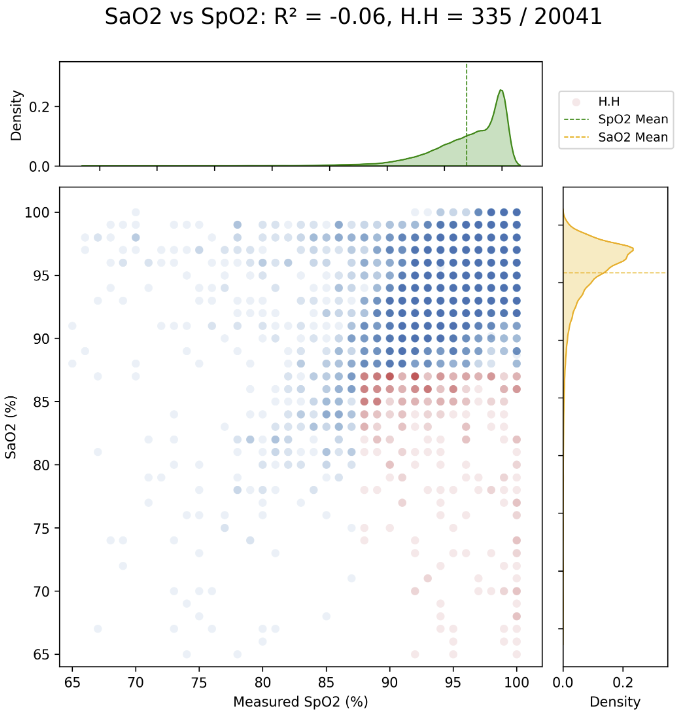

#### Measurements Distributions

In [ ]:
def sao2_spo2_dists(data, races):

  fig, ax = plt.subplots(len(races), 1, sharex= True, sharey=True,
                        figsize=(2 * len(races), 5))

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SaO2, ax=ax[i],
                  color='orange', fill=True, label="SaO2")
      sns.kdeplot(x=data[data.race_group == r].SpO2, ax=ax[i],
                  color='green', fill=True, label="SpO2")
      ax[i].set_xlim([90,100])
      ax[i].legend(loc='upper left', ncol=1, fontsize=9)
      ax[i].set_xlabel('O2 Saturation (%)')
      ax[i].set_title(f'{r} Patients')

  fig.suptitle('SaO2 and SpO2 Density Distributions')
  plt.show()

In [ ]:
# Encode Race Groups
data.race_group = data.race_group.apply(lambda x: 'Non-White' if x != 'White' \
                                                              else 'White')

races = data.race_group.unique() #["White", "Non-White"]

In [ ]:
sao2_spo2_dists(data, races)

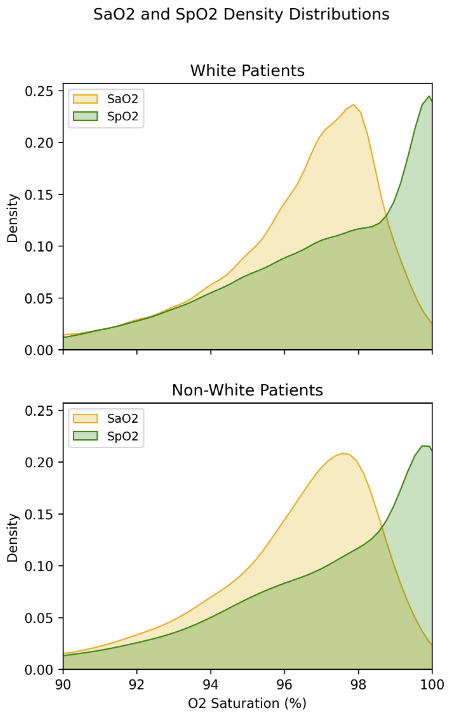

#### Gap Distributions

In [ ]:
def sao2_spo2_gap(data, races, comparison="White vs. Non-White"):

  fig, ax = plt.subplots(1, 1, sharex= True, sharey=True, figsize=(8,4))

  colors = ['green', 'black']

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SpO2 - data[data.race_group == r].SaO2,
                  ax=ax, color=colors[i], fill=True, label=r)
      
  ax.set_xlim([-4,4])
  ax.legend(loc='upper left', ncol=1, fontsize=9)
  ax.set_xlabel('SpO2 - SaO2 (%)')
  ax.set_title(f'SpO2 - SaO2 Gap Distribution, {comparison} Patients')

  plt.show()

In [ ]:
sao2_spo2_gap(data, races, comparison="White vs. Non-White")

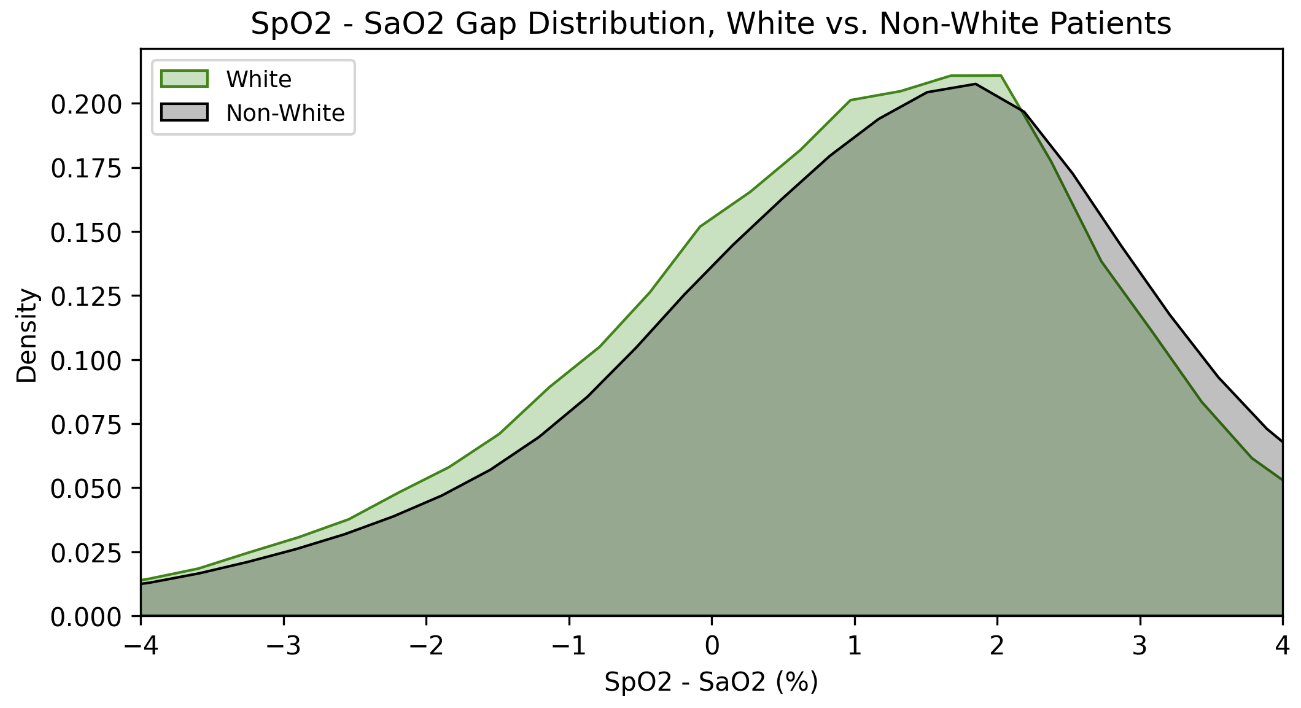

### ✏️ Further EDA
`Create code below to answer the following questions`


What is the Outcome Distribution? 

In [ ]:
# Code here!

Is it more pronounced across certain groups?

In [ ]:
# Code here!

Add Other Questions that may be relevant

In [ ]:
# Code here!

In [ ]:
# Code here!

## 4. ML Task Definition

​
**We suggest (but not limited to), 4 possible ML tasks:**

* Hidden Hypoxemia Prediction (Classification)
* $SaO_2$ Prediction (Regression)
* $SaO_2 - SpO_2$ Gap Prediction (Regresion)
* $SaO_2 - SpO_2$ Gap Magnitude Prediction (Classification)

Discuss, as a team:

* Which task yields more value to tackle the presented problem?

* Which task is more prone to errors or biases?

* Where do we have more information?

* Where is there more outcome imbalance?

* Which decision-support algorithm would not harm patients further?

* How will the evaluation be done if we pick a certain task?

* Can we solve more than one task at once?


**Keep in mind that there is no right answer!**
​

### ✏️ Pick one!

`Pick one, or suggest your own:`